In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [56]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
import numpy as np
import scipy.stats as stats
import collections
import math

from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec

In [57]:
def inertia(number_of_clusters, X, labels):
    
    manual_SSE = 0
    for i in range(number_of_clusters):
        cluster = X[labels == i]
        if len(cluster) > 0:
                clusterMean = cluster.mean(axis = 0)
                manual_SSE += ((cluster - clusterMean) ** 2).sum()
                
    return manual_SSE

In [58]:
def run_optics(X, metric):
    
    max_samples = 50
    sse_list = list()
    silhouette = list()
    calinski = list()
    bouldin = list()
    fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))

    for k in range(2, max_samples+1):
        
        #-----------------------------------run algorithm------------------------------------#
        optics = OPTICS(min_samples = k, max_eps=np.inf, metric = metric)
        optics.fit(X)
    
        #-----------------------------------calculate metrics--------------------------------#
        
        labels = optics.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        sse = inertia(n_clusters, X, labels)
        sse_list.append(sse)
        
        sil = silhouette_score(X, labels)
        silhouette.append(sil)
        
        cal = calinski_harabasz_score(X, labels)
        calinski.append(cal)
        
        boul = davies_bouldin_score(X, labels)
        bouldin.append(boul)
        
        print("k: ", k)
        print ('SSE: ', sse)
        print ('Silhouette Score: ', sil)
        print ("Calinski - Harabaz Score: ", cal)
        print ("Davies - Bouldin Score: ", boul)
        print()
        print("---------------------------------")
        print()
        
        
    
    index = [i for i in range(2, max_samples + 1)]
    
    ax[0, 0].plot(range(2, len(sse_list) + 2), sse_list)
    ax[0, 0].set_ylabel('SSE', fontsize=15)
    ax[0, 0].set_xlabel('K', fontsize=15)

    ax[0, 1].plot(range(2, len(silhouette) + 2), silhouette)
    ax[0, 1].set_ylabel('SIL', fontsize=15)
    ax[0, 1].set_xlabel('K', fontsize=15)

    ax[1, 0].plot(range(2, len(calinski) + 2), calinski)
    ax[1, 0].set_ylabel('CAL', fontsize=15)
    ax[1, 0].set_xlabel('K', fontsize=15)

    ax[1, 1].plot(range(2, len(bouldin) + 2), bouldin)
    ax[1, 1].set_ylabel('BOUL', fontsize=15)
    ax[1, 1].set_xlabel('K', fontsize=15)
    
    for axis in ax.flat:
        axis.xaxis.set_major_locator(MultipleLocator(5))
        axis.xaxis.set_minor_locator(MultipleLocator(1))
        axis.tick_params(which='major', length=9)
        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [59]:
def plot_reachability_otpics_dbscan(X, clust):
    
    labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=0.5)
    labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                       core_distances=clust.core_distances_,
                                       ordering=clust.ordering_, eps=2)

    space = np.arange(len(X))
    reachability = clust.reachability_[clust.ordering_]
    labels = clust.labels_[clust.ordering_]

    plt.figure(figsize=(10, 7))
    G = gridspec.GridSpec(2, 3)
    ax1 = plt.subplot(G[0, :])
    ax2 = plt.subplot(G[1, 0])
    ax3 = plt.subplot(G[1, 1])
    ax4 = plt.subplot(G[1, 2])

    # Reachability plot
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = space[labels == klass]
        Rk = reachability[labels == klass]
        ax1.plot(Xk, Rk, color, alpha=0.3)
    ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
    ax1.plot(space, np.full_like(space, 2., dtype=float), 'k-', alpha=0.5)
    ax1.plot(space, np.full_like(space, 0.5, dtype=float), 'k-.', alpha=0.5)
    ax1.set_ylabel('Reachability (epsilon distance)')
    ax1.set_title('Reachability Plot')

    # OPTICS
    colors = ['g.', 'r.', 'b.', 'y.', 'c.']
    for klass, color in zip(range(0, 5), colors):
        Xk = X[clust.labels_ == klass]
        ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k+', alpha=0.1)
    ax2.set_title('Automatic Clustering\nOPTICS')

    # DBSCAN at 0.5
    colors = ['g', 'greenyellow', 'olive', 'r', 'b', 'c']
    for klass, color in zip(range(0, 6), colors):
        Xk = X[labels_050 == klass]
        ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3, marker='.')
    ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], 'k+', alpha=0.1)
    ax3.set_title('Clustering at 0.5 epsilon cut\nDBSCAN')

    # DBSCAN at 2.
    colors = ['g.', 'm.', 'y.', 'c.']
    for klass, color in zip(range(0, 4), colors):
        Xk = X[labels_200 == klass]
        ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
    ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], 'k+', alpha=0.1)
    ax4.set_title('Clustering at 2.0 epsilon cut\nDBSCAN')

    plt.tight_layout()
    plt.show()

In [60]:
def get_metrics(optics, X, name_of_index): 

    labels = optics.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
    sse = inertia(n_clusters, X, labels)
        
    sil = silhouette_score(X, labels)
        
    cal = calinski_harabasz_score(X, labels)
        
    boul = davies_bouldin_score(X, labels)
        
    print ('SSE: ', sse)
    print ('Silhouette Score: ', sil)
    print ("Calinski - Harabaz Score: ", cal)
    print ("Davies - Bouldin Score: ", boul)
    
    df_metrics = pd.DataFrame({'Distance': optics.get_params()['metric'], \
                               'N_clusters': n_clusters, 'SSE': '%.4f'%(sse), \
                               'Silhouette': '%.4f'%(sil), 'Calinski': '%.4f'%(cal), \
                               'Bouldin': '%.4f'%(boul)}, index = [name_of_index])
    
    return df_metrics

In [61]:
def visualize_clusters(df, X, list_of_columns, optics):
    
    for x in range(len(list_of_columns)):
        for z in range(x+1, len(list_of_columns)):
            
            i = df.columns.values.tolist().index(list_of_columns[x])
            j = df.columns.values.tolist().index(list_of_columns[z])

            plt.title(list_of_columns[x].title() + " - " + list_of_columns[z].title())
            plt.xlabel(list_of_columns[x])
            plt.ylabel(list_of_columns[z])
    
            for cluster_id in np.unique(optics.labels_):
                indexes = np.where(optics.labels_==cluster_id)
                plt.scatter(X[indexes,i], X[indexes,j], alpha=0.4)
                
            plt.show()

In [62]:
def cluster_insight(df):
    
    cluster_diz = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0

    for i in np.unique(df['Labels']):

        cluster_list = list(df[df['Labels'] == i]['album_type'])

        counter = collections.Counter(cluster_list)

        cluster_diz.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter[0]
        cluster_diz.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter[1]

        #cluster_diz.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_diz.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()

        lista = cluster_diz.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        cluster_diz.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = tot
        dim_clusters.append(tot)

        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        if entropy_single != 0.0:
            entropy_single*=-1
        cluster_diz.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)


        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_diz.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)


    new_row = pd.Series(cluster_diz[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_diz = cluster_diz.append(new_row, ignore_index=False)

    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti. 
    '''

    last_tot = cluster_diz.loc['Total', 'Tot_Cluster']
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))

    cluster_diz.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)

    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori.
    '''

    tot_purity = max_cluster/last_tot
    cluster_diz.loc["Total", 'Purity'] = "%.4f" %(tot_purity)



    cluster_diz['Tot_Cluster'] = cluster_diz['Tot_Cluster'].astype(int)

    ipd.display(cluster_diz)

In [63]:
def concatenate(df_generale, df):
    
    #new_row = pd.Series(dtype='object', name = '----------')
    #df_generale = df_generale.append(new_row, ignore_index=False)
    #df_generale = df_generale.replace(np.nan, '----------', regex = True)
    
    df_generale = pd.concat([df_generale, df])
    #ipd.display(df_generale)
    
    return df_generale

In [64]:
df_complete = pd.read_csv('group_20_fma_numeric.csv', index_col = 0)

In [65]:
df_complete

,chroma_cens_02,chroma_cens_04,chroma_cens_06,chroma_cens_07,chroma_cens_09,chroma_cens_11,chroma_stft_05,chroma_stft_08,chroma_stft_10,chroma_stft_12,...,track_genre_top_Easy_Listening,track_genre_top_Instrumental,track_bit_rate,track_duration,track_listens,track_date_created_year,track_date_created_season,artist_favorites,album_favorites,album_type
track_id,,,,,,,,,,,,,,,,,,,,,
2,0.534301,0.311606,0.336365,0.341694,0.292243,0.276052,0.341598,0.430064,0.381936,0.529627,...,0,0,256000,168,1293,1,3,9,4,0
3,0.331490,0.296091,0.368770,0.550413,0.464814,0.363497,0.391794,0.581584,0.510926,0.540496,...,0,0,256000,237,514,1,3,9,4,0
5,0.438305,0.298619,0.358552,0.411062,0.515737,0.338845,0.335509,0.353870,0.418968,0.467409,...,0,0,256000,206,1151,1,3,9,4,0
10,0.414595,0.309863,0.438154,0.616182,0.399730,0.369890,0.357122,0.420764,0.370725,0.388618,...,0,0,192000,161,50135,1,3,74,4,0
20,0.354114,0.256808,0.361826,0.415287,0.368049,0.419011,0.390003,0.575782,0.556986,0.491322,...,0,0,256000,311,361,1,3,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155316,0.239374,0.506758,0.610919,0.257752,0.253840,0.242582,0.512779,0.418091,0.422479,0.476460,...,0,0,320000,162,102,10,1,0,0,1
155317,0.376784,0.453340,0.290186,0.281965,0.324159,0.404858,0.579709,0.609059,0.567302,0.643192,...,0,0,320000,217,165,10,1,0,0,1
155318,0.297417,0.480687,0.499205,0.311303,0.363107,0.317513,0.582218,0.529418,0.496228,0.579227,...,0,0,320000,404,168,10,1,0,0,1


In [66]:
df_complete.shape

(103708, 56)

**Continous variables**

In [67]:
numeric_columns = []  # continous variables
for column_name in df_complete.columns:
    if ("track_genre_top" not in column_name) and  \
          ("track_date_created_year" not in column_name) and \
            ("track_date_created_season" not in column_name):
                numeric_columns.append(column_name)
print("numeric_columns", len(numeric_columns))

numeric_columns 38


**Ordinal or Categorical variables**

In [68]:
categoric_columns = []  # ordinal or categorical variables
for column_name in df_complete.columns:
    if ("track_genre_top" in column_name) or  \
          ("track_date_created_year" in column_name) or \
            ("track_date_created_season" in column_name):
                categoric_columns.append(column_name)
print("categoric_columns", len(categoric_columns))

categoric_columns 18


<h1>OPTICS - cityblock distance</h1>

In [69]:
df_tracks_librosa_complete = df_complete[['mfcc_03', 'track_listens', 'artist_favorites', 'album_type']]

In [70]:
df_tracks_librosa_complete

,mfcc_03,track_listens,artist_favorites,album_type
track_id,,,,
2,0.421154,1293,9,0
3,0.449291,514,9,0
5,0.505918,1151,9,0
10,0.382519,50135,74,0
20,0.599838,361,10,0
...,...,...,...,...
155316,0.460963,102,0,1
155317,0.506290,165,0,1
155318,0.448987,168,0,1


In [71]:
df_tracks_librosa = df_tracks_librosa_complete[[col for col in df_tracks_librosa_complete.columns if \
                                                col != 'album_type']]

In [72]:
df_tracks_librosa

,mfcc_03,track_listens,artist_favorites
track_id,,,
2,0.421154,1293,9
3,0.449291,514,9
5,0.505918,1151,9
10,0.382519,50135,74
20,0.599838,361,10
...,...,...,...
155316,0.460963,102,0
155317,0.506290,165,0
155318,0.448987,168,0


In [73]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_tracks_librosa)

In [74]:
X_scaled

array([[-0.73524464,  0.30590962,  0.26666667],
       [-0.51768102, -0.14542294,  0.26666667],
       [-0.07981614,  0.22363847,  0.26666667],
       ...,
       [-0.52003059, -0.34588644, -0.33333333],
       [-0.49349225, -0.27288528, -0.33333333],
       [ 0.02715469, -0.03476246,  0.46666667]])

<h3>Cityblock</h3>

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_optics.py:803: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


k:  2
SSE:  2292.9195696288557
Silhouette Score:  0.1964076085995996
Calinski - Harabaz Score:  10.47204944355789
Davies - Bouldin Score:  1.7032045547178873

---------------------------------

k:  3
SSE:  3717.285038830654
Silhouette Score:  -0.054737139030713124
Calinski - Harabaz Score:  10.22735873958831
Davies - Bouldin Score:  1.704781127842918

---------------------------------

k:  4
SSE:  3083.9843135273095
Silhouette Score:  -0.20432394610234128
Calinski - Harabaz Score:  10.327440421689605
Davies - Bouldin Score:  1.7206177574319734

---------------------------------

k:  5
SSE:  2183.4583689520423
Silhouette Score:  -0.3037588038226092
Calinski - Harabaz Score:  12.08118743349751
Davies - Bouldin Score:  1.703884912522926

---------------------------------

k:  6
SSE:  1632.4762214960283
Silhouette Score:  -0.38441149826702087
Calinski - Harabaz Score:  13.351336501806445
Davies - Bouldin Score:  1.7026216033846429

---------------------------------

k:  7
SSE:  1742.206833

k:  44
SSE:  17938.81137788097
Silhouette Score:  -0.04489262167522881
Calinski - Harabaz Score:  10392.337795169495
Davies - Bouldin Score:  0.7561924349760566

---------------------------------

k:  45
SSE:  21406.276138900834
Silhouette Score:  -0.03433642165986853
Calinski - Harabaz Score:  12407.903130633604
Davies - Bouldin Score:  0.9203753554585813

---------------------------------

k:  46
SSE:  21405.60437363226
Silhouette Score:  -0.4256668562668312
Calinski - Harabaz Score:  12406.361913602314
Davies - Bouldin Score:  1.0072913980903546

---------------------------------

k:  47
SSE:  21262.328421454495
Silhouette Score:  0.6355628020760005
Calinski - Harabaz Score:  13941.839703149226
Davies - Bouldin Score:  0.8521674309042802

---------------------------------

k:  48
SSE:  21262.328421454495
Silhouette Score:  0.6355628020760005
Calinski - Harabaz Score:  13941.839703149226
Davies - Bouldin Score:  0.8521674309042802

---------------------------------

k:  49
SSE:  2083

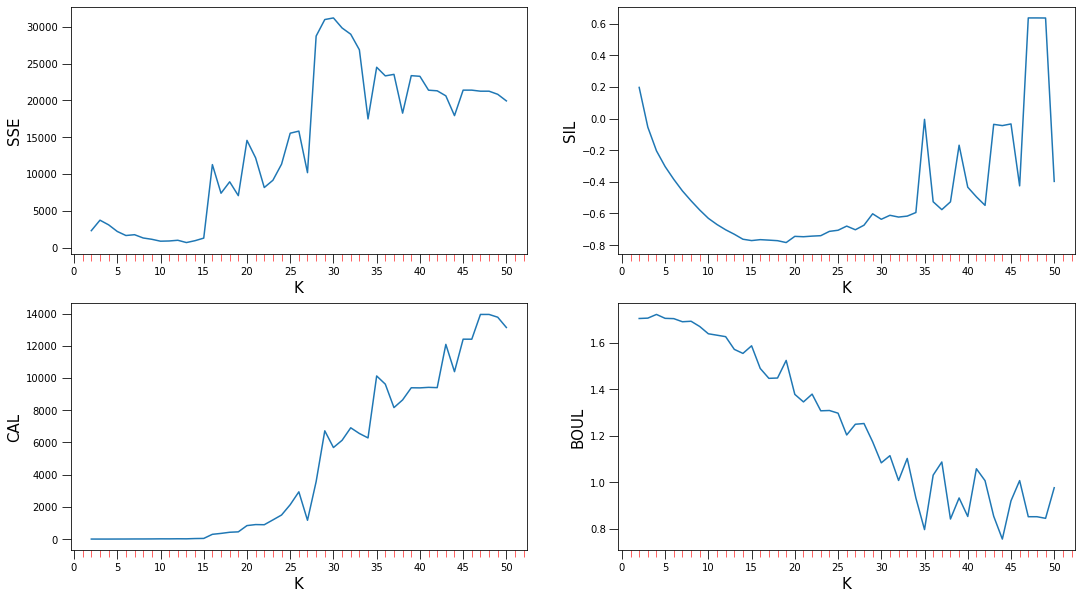

In [75]:
run_optics(X_scaled, 'cityblock')

In [76]:
# Building the OPTICS Clustering model
optics = OPTICS(min_samples=47, max_eps=np.inf, metric='cityblock')
  
# Training the model
optics.fit(X_scaled)

OPTICS(metric='cityblock', min_samples=47)

In [77]:
df_metrics_1 = get_metrics(optics, X_scaled, 'Optics_2')

SSE:  21262.328421454495
Silhouette Score:  0.6355628020760005
Calinski - Harabaz Score:  13941.839703149226
Davies - Bouldin Score:  0.8521674309042802


In [78]:
df_metrics_1

,Distance,N_clusters,SSE,Silhouette,Calinski,Bouldin
Optics_2,cityblock,8,21262.3284,0.6356,13941.8397,0.8522


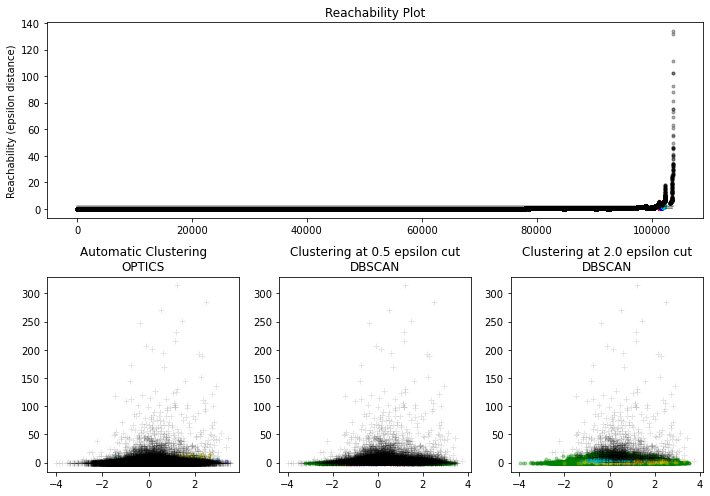

In [79]:
plot_reachability_otpics_dbscan(X_scaled, optics)

In [84]:
df_cityblock_1 = df_tracks_librosa_complete.copy()
df_cityblock_1['Labels'] = optics.labels_

In [86]:
cluster_insight(df_cityblock_1)

,Studio_Recording,Live_Recording,Tot_Cluster,Entropy,Purity
Cluster -1,90170,11525,101695,0.5099,0.8867
Cluster 0,66,0,66,0.0000,1.0000
Cluster 1,268,0,268,0.0000,1.0000
Cluster 2,289,0,289,0.0000,1.0000
Cluster 3,99,0,99,0.0000,1.0000
Cluster 4,189,0,189,0.0000,1.0000
Cluster 5,873,0,873,0.0000,1.0000
Cluster 6,107,0,107,0.0000,1.0000
Cluster 7,122,0,122,0.0000,1.0000
Total,92183,11525,103708,0.5000,0.8889


In [88]:
df_metrics_1

,Distance,N_clusters,SSE,Silhouette,Calinski,Bouldin
Optics_2,cityblock,8,21262.3284,0.6356,13941.8397,0.8522
